In [2]:
import pandas as pd

from style.constants import FILE_PATH_BOOK_DS
from style.dataset.reader import DatasetReader


dataset = DatasetReader.load_files(
    FILE_PATH_BOOK_DS, n=5000,
)


In [18]:
from collections import Counter

initial_counts = Counter(dataset.target)
initial_total_size = sum(initial_counts.values())


In [29]:
initial_prop_size = {author: round(count/initial_total_size, 3) for (author, count) in initial_counts.items()}

In [30]:
initial_prop_size

{'agatha_christie': 0.003,
 'alexander_pope': 0.001,
 'alexandre_dumas': 0.001,
 'alphonse_daudet': 0.006,
 'ambrose_bierce': 0.005,
 'andrew_lang': 0.032,
 'anton_pavlovich_chekhov': 0.012,
 'arthur_conan_doyle': 0.033,
 'beatrix_potter': 0.001,
 'bernard_shaw': 0.013,
 'bertrand_russell': 0.005,
 'bram_stoker': 0.007,
 'burton': 0.01,
 'byron': 0.001,
 'charles_dickens': 0.038,
 'charlotte_brontë': 0.004,
 'charlotte_perkins_gilman': 0.004,
 'daniel_defoe': 0.02,
 'dante_alighieri': 0.007,
 'edgar_allan_poe': 0.008,
 'edgar_rice_burroughs': 0.005,
 'edith_wharton': 0.011,
 'emily_brontë': 0.001,
 'emily_dickinson': 0.0,
 'émile_zola': 0.044,
 'f._scott_(francis_scott)_fitzgerald': 0.004,
 'frances_hodgson_burnett': 0.013,
 'franz_kafka': 0.001,
 'frederick_douglass': 0.0,
 'friedrich_wilhelm_nietzsche': 0.005,
 'fyodor_dostoyevsky': 0.014,
 'g._k._(gilbert_keith)_chesterton': 0.017,
 'george_eliot': 0.01,
 'george_sand': 0.004,
 'gustave_flaubert': 0.006,
 'guy_de_maupassant': 0.0

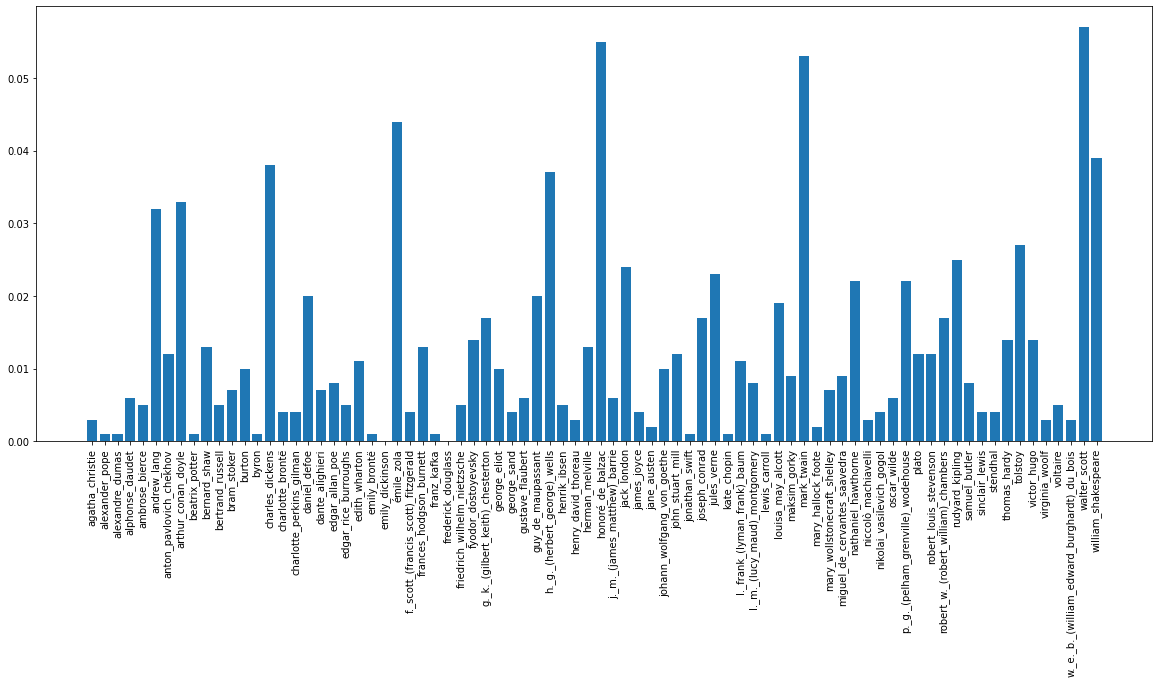

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(range(len(initial_prop_size)), list(initial_prop_size.values()), align='center')
plt.xticks(range(len(initial_prop_size)), list(initial_prop_size.keys()), rotation='vertical')

plt.show()

In [97]:
half = round(len(dataset)/2)
half

12750

In [48]:
dataset.shuffle()

In [99]:
subset = dataset[:half]
len(subset)

12750

In [54]:
subset_counts = Counter(subset.target)
subset_total_size = sum(subset_counts.values())

In [55]:
subset_prop_size = {author: round(count/subset_total_size, 3) for (author, count) in subset_counts.items()}

In [56]:
subset_prop_size

{'herman_melville': 0.013,
 'l._m._(lucy_maud)_montgomery': 0.008,
 'robert_w._(robert_william)_chambers': 0.019,
 'bram_stoker': 0.007,
 'charlotte_perkins_gilman': 0.004,
 'charles_dickens': 0.037,
 'g._k._(gilbert_keith)_chesterton': 0.018,
 'andrew_lang': 0.032,
 'charlotte_brontë': 0.005,
 'l._frank_(lyman_frank)_baum': 0.011,
 'fyodor_dostoyevsky': 0.015,
 'h._g._(herbert_george)_wells': 0.039,
 'john_stuart_mill': 0.012,
 'honoré_de_balzac': 0.056,
 'p._g._(pelham_grenville)_wodehouse': 0.022,
 'tolstoy': 0.026,
 'émile_zola': 0.043,
 'william_shakespeare': 0.039,
 'bernard_shaw': 0.013,
 'walter_scott': 0.056,
 'alexander_pope': 0.001,
 'joseph_conrad': 0.018,
 'louisa_may_alcott': 0.019,
 'james_joyce': 0.004,
 'jack_london': 0.024,
 'burton': 0.011,
 'guy_de_maupassant': 0.02,
 'arthur_conan_doyle': 0.032,
 'mark_twain': 0.051,
 'johann_wolfgang_von_goethe': 0.011,
 'edith_wharton': 0.011,
 'anton_pavlovich_chekhov': 0.011,
 'alphonse_daudet': 0.006,
 'voltaire': 0.004,
 '

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(range(len(initial_prop_size)), list(initial_prop_size.values()), align='center')
plt.xticks(range(len(initial_prop_size)), list(initial_prop_size.keys()), rotation='vertical')

plt.show()

In [72]:
df_in = pd.DataFrame(initial_prop_size.items(), columns=['author', 'initial_share'])
df_in

,author,initial_share
0,agatha_christie,0.003
1,alexander_pope,0.001
2,alexandre_dumas,0.001
3,alphonse_daudet,0.006
4,ambrose_bierce,0.005
...,...,...
75,virginia_woolf,0.003
76,voltaire,0.005
77,w._e._b._(william_edward_burghardt)_du_bois,0.003
78,walter_scott,0.057


In [73]:
df_sub = pd.DataFrame(subset_prop_size.items(), columns=['author', 'subset_share'])
df_sub

,author,subset_share
0,herman_melville,0.013
1,l._m._(lucy_maud)_montgomery,0.008
2,robert_w._(robert_william)_chambers,0.019
3,bram_stoker,0.007
4,charlotte_perkins_gilman,0.004
...,...,...
75,beatrix_potter,0.001
76,jonathan_swift,0.001
77,frederick_douglass,0.000
78,kate_chopin,0.001


In [75]:
df_merged = pd.merge(df_in, df_sub, how='outer', on='author')
df_merged

,author,initial_share,subset_share
0,agatha_christie,0.003,0.003
1,alexander_pope,0.001,0.001
2,alexandre_dumas,0.001,0.001
3,alphonse_daudet,0.006,0.006
4,ambrose_bierce,0.005,0.004
...,...,...,...
75,virginia_woolf,0.003,0.003
76,voltaire,0.005,0.004
77,w._e._b._(william_edward_burghardt)_du_bois,0.003,0.003
78,walter_scott,0.057,0.056


<AxesSubplot:xlabel='author'>

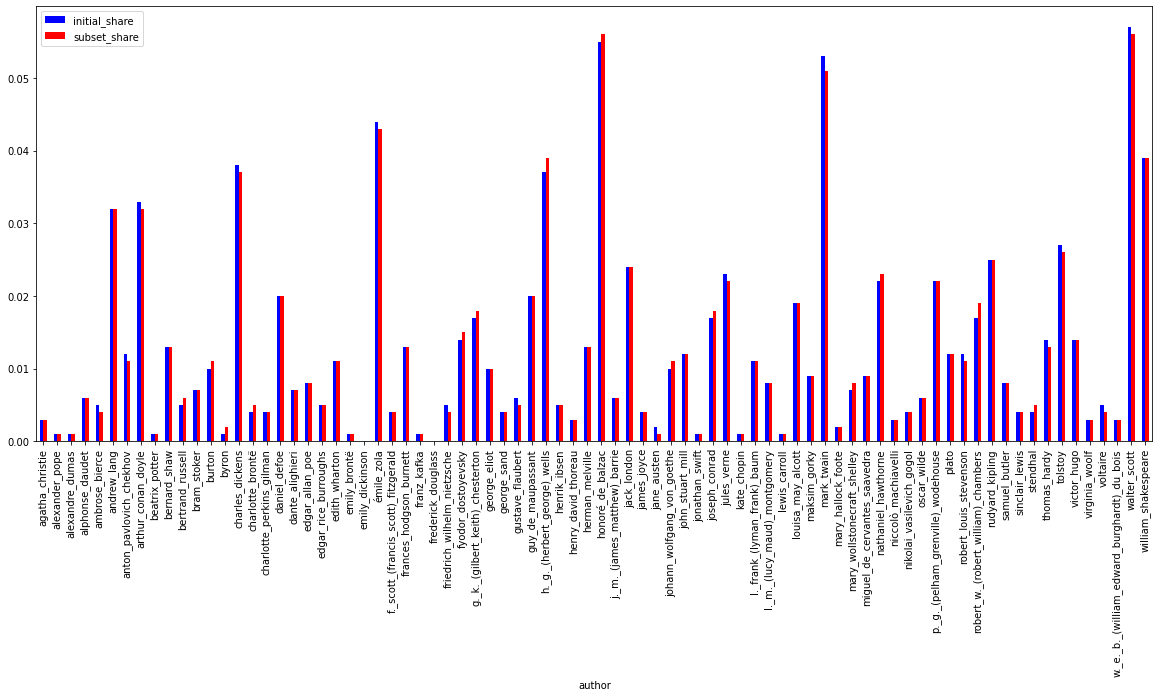

In [107]:
df_merged.plot.bar(rot=90, x='author', color={"initial_share": "blue", "subset_share": "red"}, figsize=(20,8))

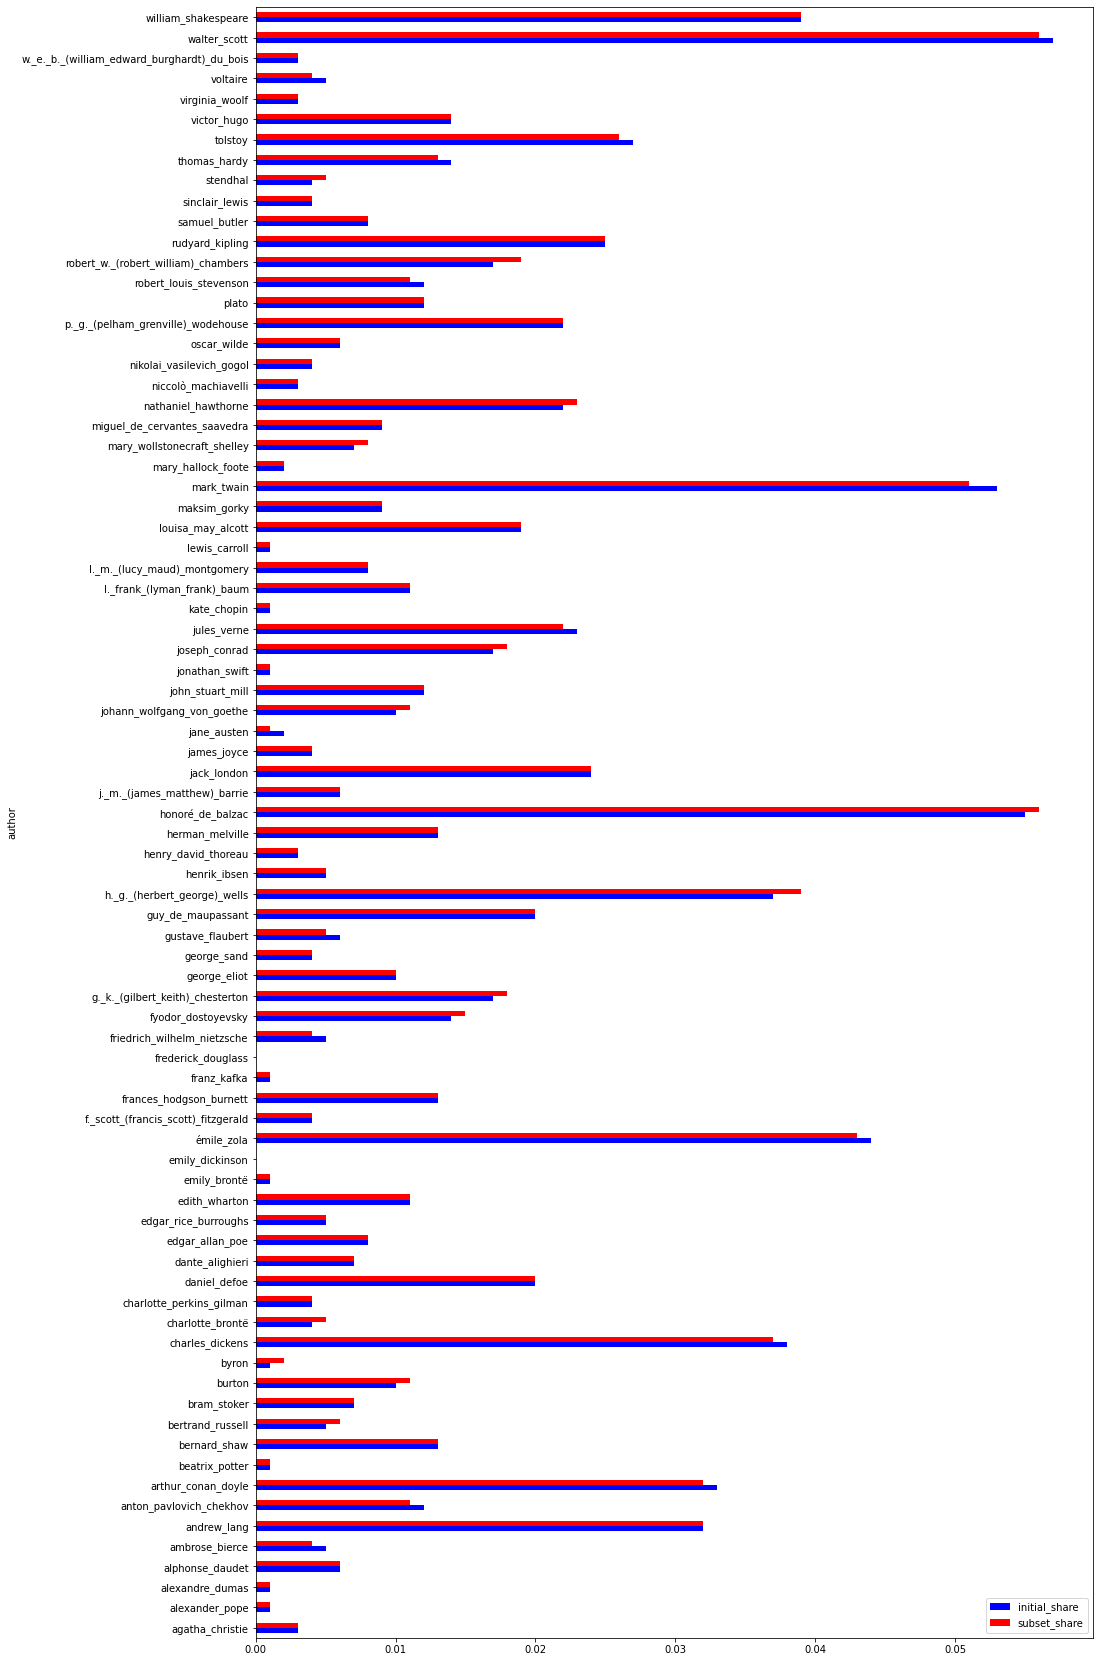

In [108]:
df_merged.plot.barh(rot=0, x='author', color={"initial_share": "blue", "subset_share": "red"}, figsize=(15,30))

plt.savefig('deneme.svg')

In [106]:
df_merged.columns

Index(['author', 'initial_share', 'subset_share'], dtype='object')